In [1]:
%run ../methods/original-sudoku-module.py
%run ../graphics/plot-settings.py

In [2]:
import pickle
interval = list(range(999,1000))
interval = [800,900,990,999]
interval = [990,999]
interval = [999]
results = []

for i in interval:
    solutions = pickle.load(open('../data/resultaten/results-{:0>3.0f}.pkl'.format(i), 'rb'))
    M = len(solutions)
    solution = solutions[0]
    result_array=np.array(solution['result'])
    E = result_array[:,0]
    S = result_array[:,1]
    J = result_array[:,-2]
    t = result_array[:,2]
    results.append([t,E,S,J])    
    score = 0
    for j in range(M):
        score += 1 if solutions[j]['energy']==0 else 0

    print(i, score/M)

999 1.0


In [3]:
import pandas as pd

def create_plot(
    ax1_ylimits=None,
    ax2_ylimits=None,
    ax3_xlimits=None,
    file_name  ='04-1st-critical-temperature.png',
    both=False
):
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False,figsize=(15, 20), dpi=80)

    label_critical_temperature = 'Critical temperature = {:.2f}'.format(minimal_row['T'])
    label_2nd_critical_temperature = '2nd Critical temperature = {:.2f}'.format(closest_row['T'])
    
    ax = ax1
    ax.plot(X['Entropy'],X['T'],linewidth=3.0,label='Steered temperature',color=color7,zorder=1)
    ax.plot(X['Entropy'],X['t'],linewidth=3.0,label='Measurerd temperature',color=color2,zorder=-1)
    ax.set_ylim([-15,15])
    ax.set_ylim(ax1_ylimits)
    ax.axhline(y=minimal_row['T'],color="gray", linestyle="dashed",label=label_critical_temperature,lw=1)
    ax.axvline(x=minimal_row['Entropy'],color="gray", linestyle="dashed",lw=1)
    if both:
        ax.axhline(y=closest_row['T'],color="gray", linestyle="dotted",label=label_2nd_critical_temperature,lw=1)
        ax.axvline(x=closest_row['Entropy'],color="gray", linestyle="dashed",lw=1)
    ax.axhline(y=0, color="gray", linestyle="dotted")
    ax.set_title('STEERED VS MEASURED TEMPERATURE')
    ax.set_xlabel('Entropy')
    ax.set_ylabel('Temperature')
    ax.legend(framealpha=0.9)

    ax = ax2
    ax.plot(Y['Entropy'],Y['dT'],lw=3,color=color7,label='$dT/dS$')
    ax.axvline(x=minimal_row['Entropy'],color="gray", linestyle="dashed",label=label_critical_temperature,lw=1)
    if both:
        ax.axvline(x=closest_row['Entropy'],color="gray", linestyle="dotted",label=label_2nd_critical_temperature,lw=1)
    ax.axhline(y=0, color="gray", linestyle="dotted")
    ax.set_xlabel('Entropy')
    ax.set_ylabel('$dT/dS$')
    ax.set_title('CHANGE IN TEMPERATURE AS FUNCTION OF ENTROPY')
    ax.set_ylabel('Temperature change')
    ax.set_ylim(ax2_ylimits)
    ax.legend(framealpha=0.9)

    ax = ax3
    ax.plot(Y['T'],Z['Energy'],linewidth=3.0,label='Heat Capacity',color=color2, zorder=1)
    ax.plot(Y['T'],Z['Entropy'],linewidth=3.0,label='Entropic Capacity',color=color7, zorder=-1)
    ax.axvline(x=Y.iloc[idx]['T'], color='gray', linewidth=1.0, label=label_critical_temperature,linestyle = 'dashed')
    if both:
        ax.axvline(x=closest_row['T'], color='gray', linewidth=1.0, label=label_2nd_critical_temperature,linestyle = 'dotted')
    ax.axhline(y=0, color="gray", linestyle="dotted")
    ax.set_title('HEAT CAPACITY & ENTROPIC CAPACITY')
    ax.set_xlim(ax3_xlimits)
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Capacity')
    ax.legend(framealpha=0.9)

    fig.suptitle('HEAT CAPACITY, ENTROPIC CAPACITY AND CRITICAL TEMPERATURE',y=0.995)
    fig.tight_layout() 

    plt.savefig('../output/{}'.format(file_name),transparent=True)

In [4]:
X = pd.DataFrame(np.transpose(np.asarray([t,S,E])),columns=['T','Entropy','Energy'])
X['t'] = X.diff()['Energy']/X.diff()['Entropy']
Y = X.groupby('T').mean()
Y.reset_index(inplace=True)

Z = Y.diff()
Y['dT'] = Z['T']/Z['Entropy']
idx = Z.idxmax()['Energy']

index = np.abs(Y['T'] - 0.72).idxmin()
closest_row = Y.iloc[index]
index = Y['dT'].idxmin()
minimal_row = Y.iloc[index]

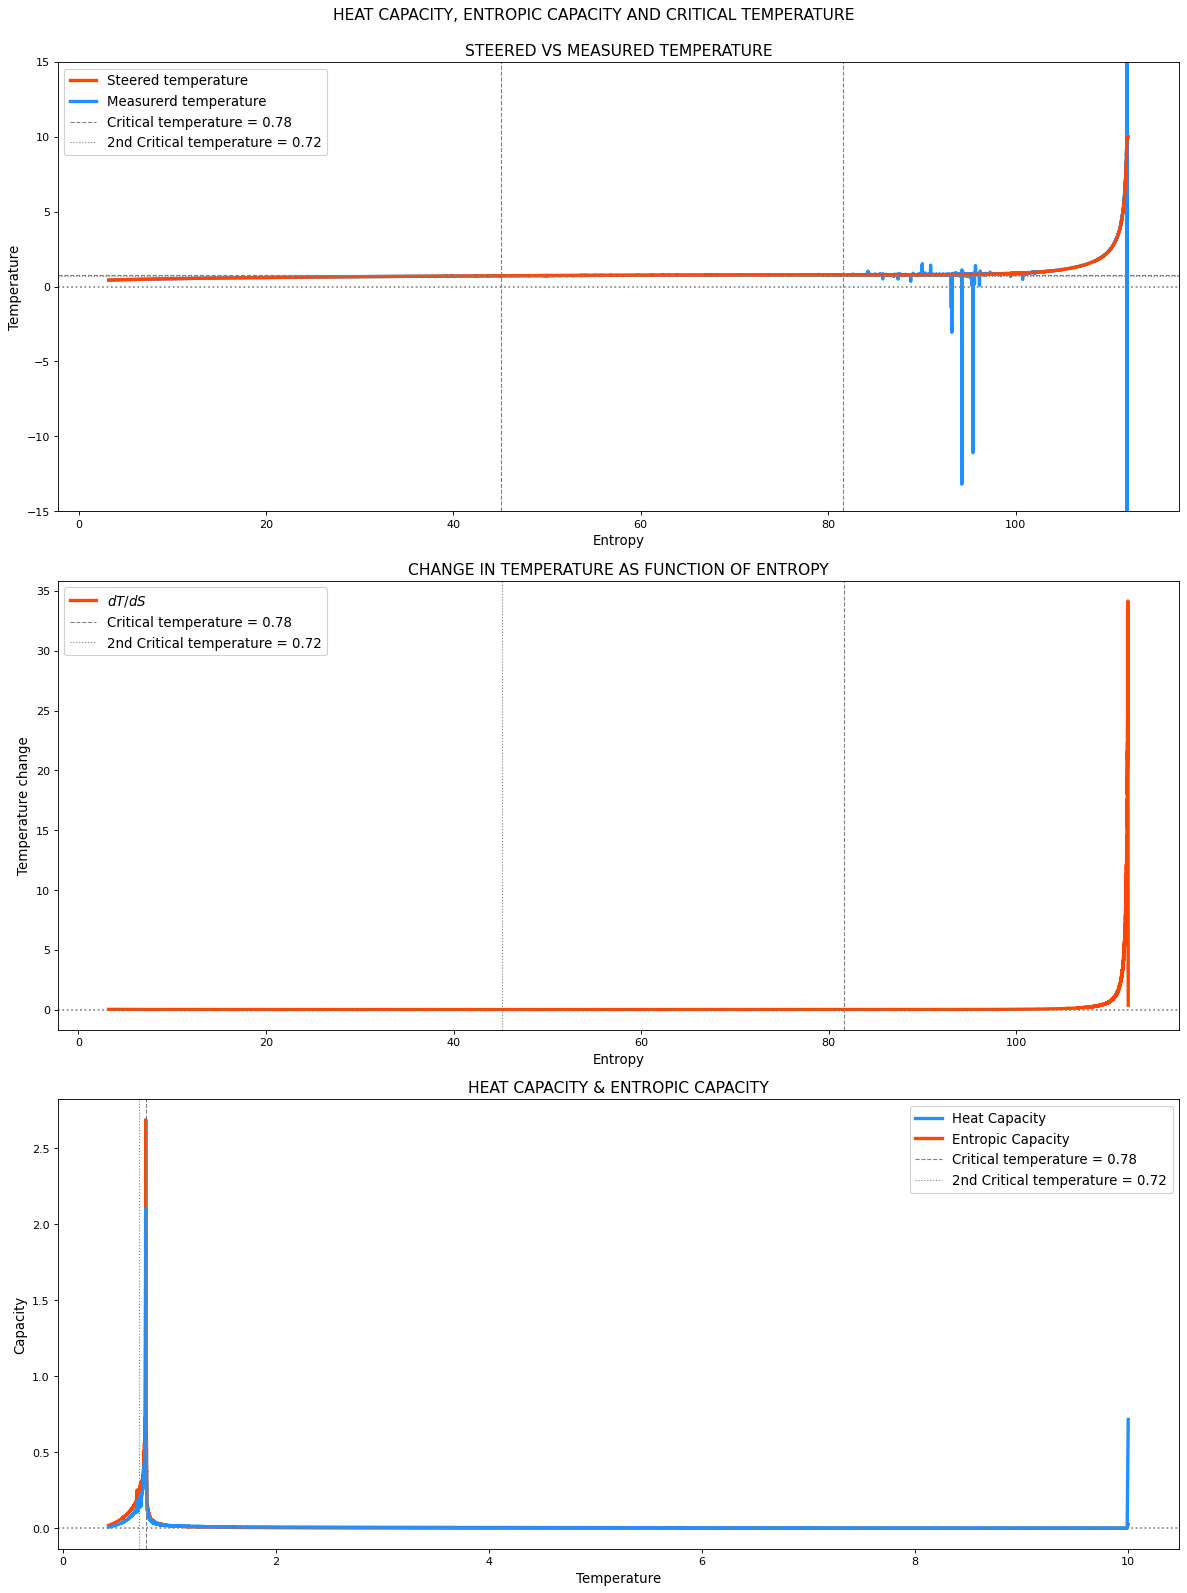

In [9]:
create_plot(both=True)

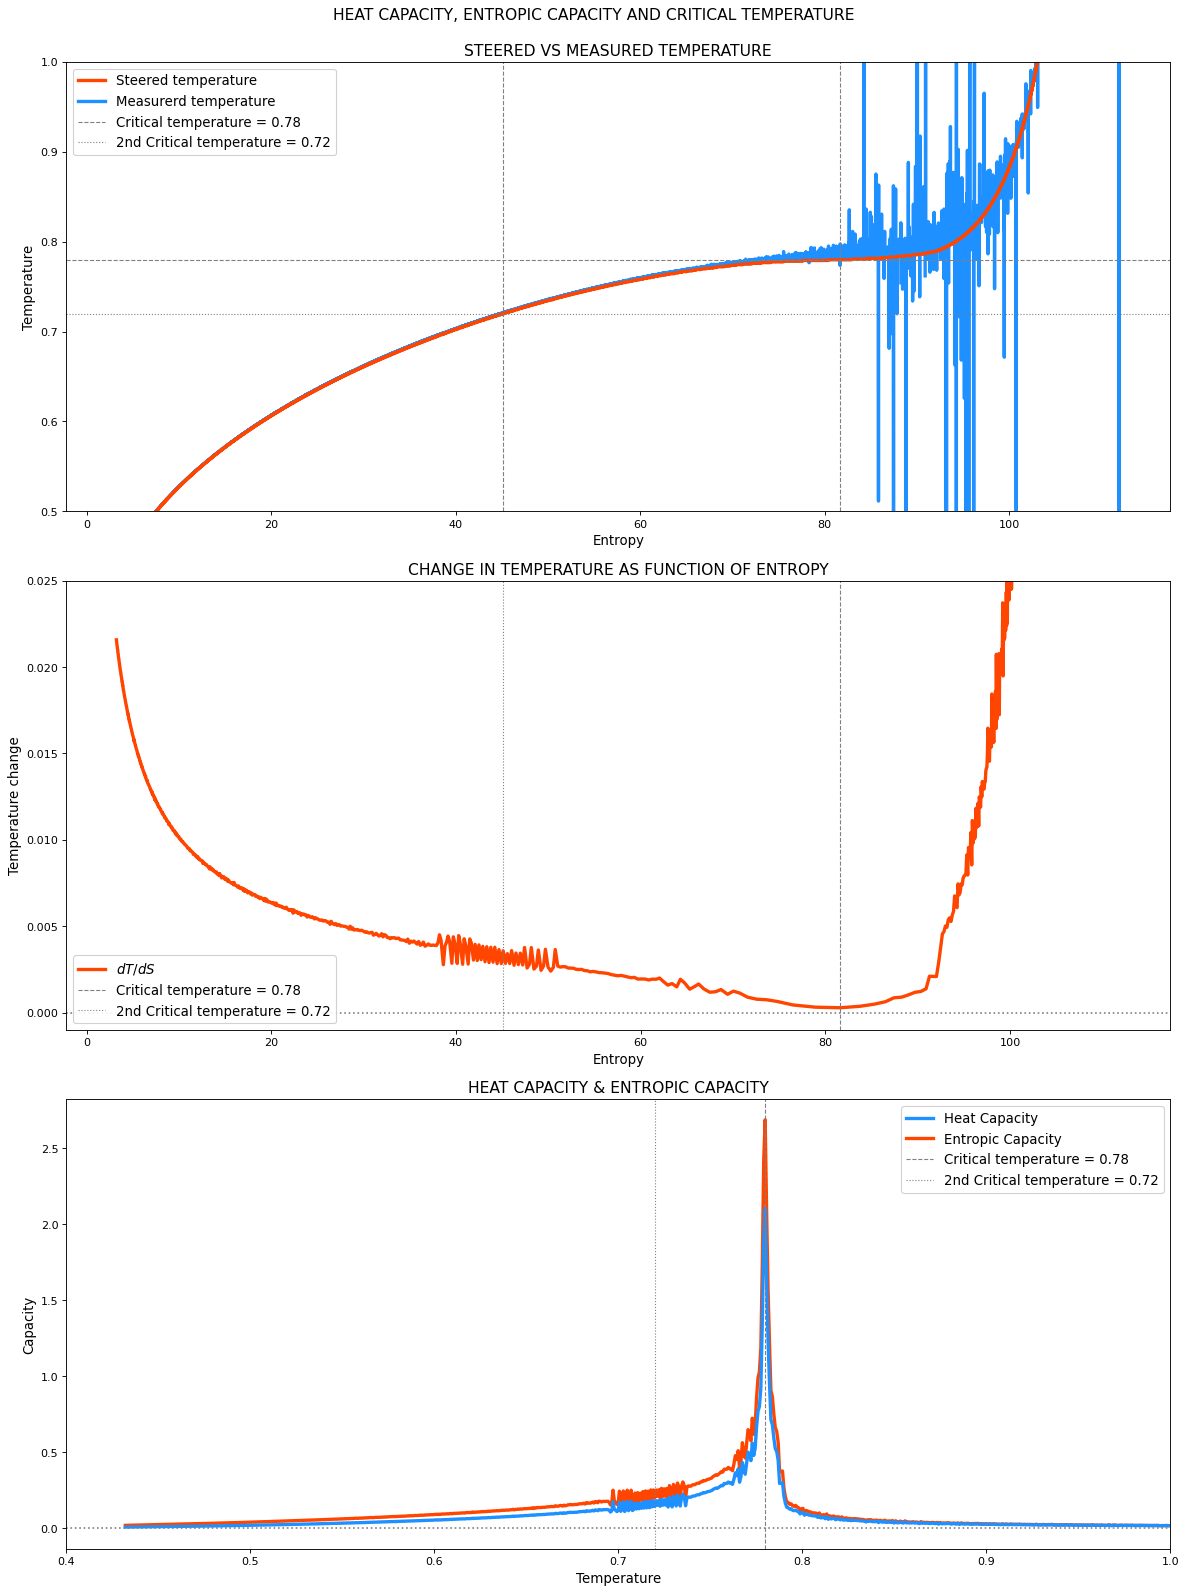

In [6]:
ax1_ylimits = [0.5,1.0]
ax2_ylimits = [-0.001,0.025]
ax3_xlimits = [0.4,1]
file_name   = '04-2nd-critical-temperature.png'

create_plot(ax1_ylimits,ax2_ylimits,ax3_xlimits,file_name,both=True)

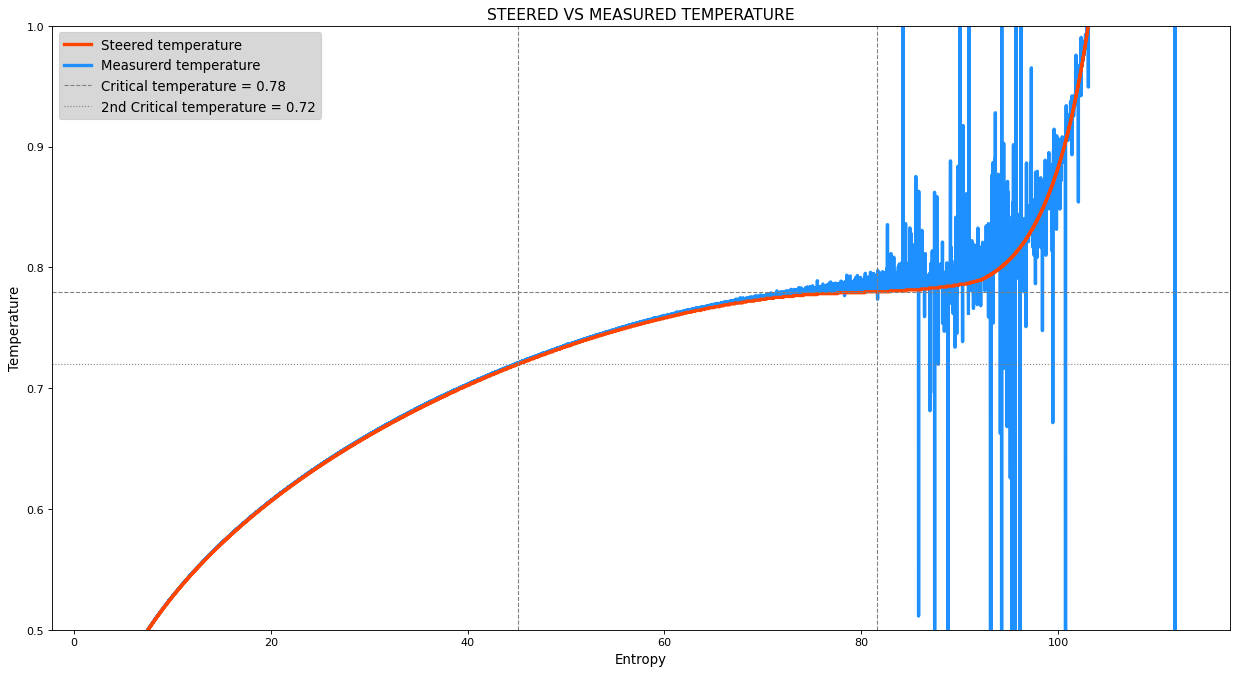

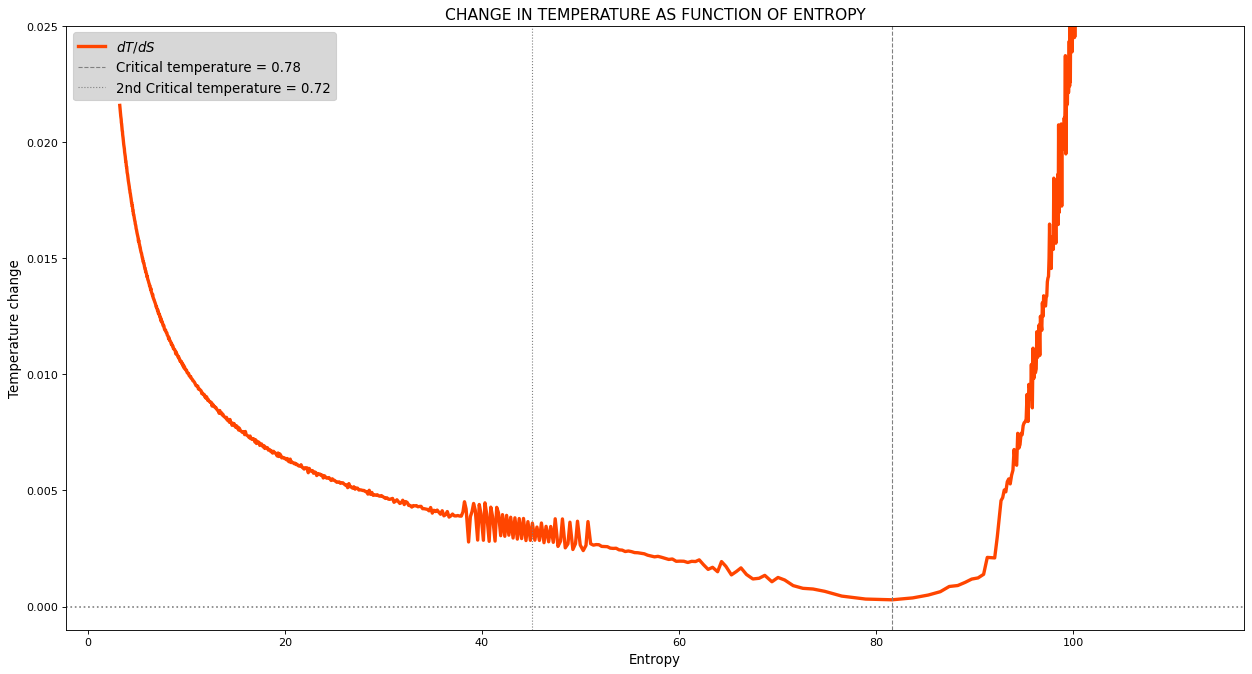

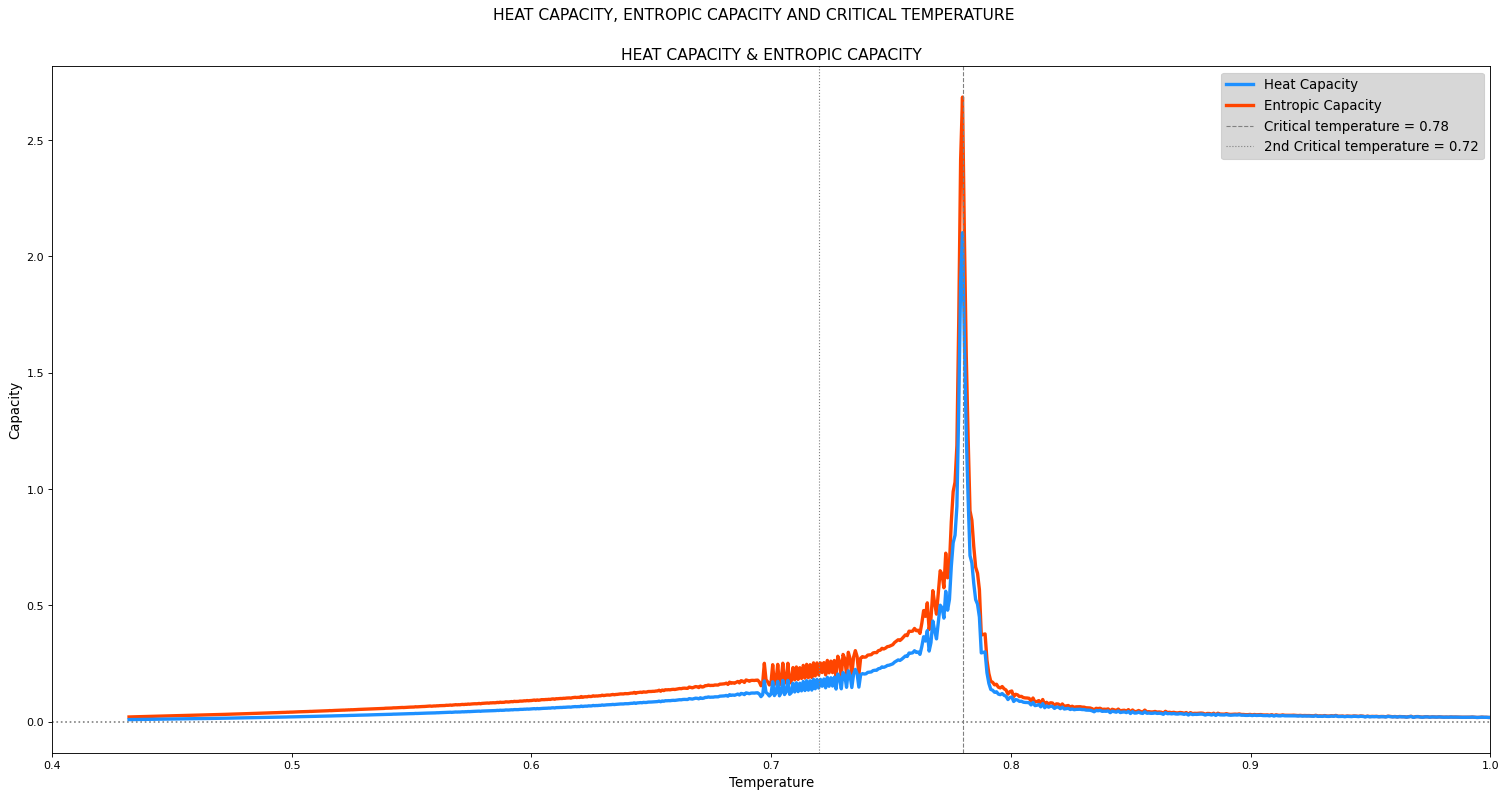

In [7]:
both = True
figsize=(19, 10)
legend_color = 'lightgrey'
fig, ax = plt.subplots(1, sharex=False,figsize=figsize, dpi=80)

label_critical_temperature = 'Critical temperature = {:.2f}'.format(minimal_row['T'])
label_2nd_critical_temperature = '2nd Critical temperature = {:.2f}'.format(closest_row['T'])

# ax = ax1
ax.plot(X['Entropy'],X['T'],linewidth=3.0,label='Steered temperature',color=color7,zorder=1)
ax.plot(X['Entropy'],X['t'],linewidth=3.0,label='Measurerd temperature',color=color2,zorder=-1)
ax.set_ylim([-15,15])
ax.set_ylim(ax1_ylimits)
ax.axhline(y=minimal_row['T'],color="gray", linestyle="dashed",label=label_critical_temperature,lw=1)
ax.axvline(x=minimal_row['Entropy'],color="gray", linestyle="dashed",lw=1)
if both:
    ax.axhline(y=closest_row['T'],color="gray", linestyle="dotted",label=label_2nd_critical_temperature,lw=1)
    ax.axvline(x=closest_row['Entropy'],color="gray", linestyle="dashed",lw=1)
ax.axhline(y=0, color="gray", linestyle="dotted")
ax.set_title('STEERED VS MEASURED TEMPERATURE')
ax.set_xlabel('Entropy')
ax.set_ylabel('Temperature')
ax.legend(framealpha=0.9,facecolor=legend_color)
plt.savefig('../output/presentation/{}'.format('04-2nd-critical-temperature-01.png'),transparent=True)


fig, ax = plt.subplots(1, sharex=False,figsize=figsize, dpi=80)
# ax = ax2
ax.plot(Y['Entropy'],Y['dT'],lw=3,color=color7,label='$dT/dS$')
ax.axvline(x=minimal_row['Entropy'],color="gray", linestyle="dashed",label=label_critical_temperature,lw=1)
if both:
    ax.axvline(x=closest_row['Entropy'],color="gray", linestyle="dotted",label=label_2nd_critical_temperature,lw=1)
ax.axhline(y=0, color="gray", linestyle="dotted")
ax.set_xlabel('Entropy')
ax.set_ylabel('$dT/dS$')
ax.set_title('CHANGE IN TEMPERATURE AS FUNCTION OF ENTROPY')
ax.set_ylabel('Temperature change')
ax.set_ylim(ax2_ylimits)
ax.legend(framealpha=0.9,facecolor=legend_color)
plt.savefig('../output/presentation/{}'.format('04-2nd-critical-temperature-02.png'),transparent=True)

fig, ax = plt.subplots(1, sharex=False,figsize=figsize, dpi=80)
# ax = ax3
ax.plot(Y['T'],Z['Energy'],linewidth=3.0,label='Heat Capacity',color=color2, zorder=1)
ax.plot(Y['T'],Z['Entropy'],linewidth=3.0,label='Entropic Capacity',color=color7, zorder=-1)
ax.axvline(x=Y.iloc[idx]['T'], color='gray', linewidth=1.0, label=label_critical_temperature,linestyle = 'dashed')
if both:
    ax.axvline(x=closest_row['T'], color='gray', linewidth=1.0, label=label_2nd_critical_temperature,linestyle = 'dotted')
ax.axhline(y=0, color="gray", linestyle="dotted")
ax.set_title('HEAT CAPACITY & ENTROPIC CAPACITY')
ax.set_xlim(ax3_xlimits)
ax.set_xlabel('Temperature')
ax.set_ylabel('Capacity')
ax.legend(framealpha=0.9,facecolor=legend_color)
plt.savefig('../output/presentation/{}'.format('04-2nd-critical-temperature-03.png'),transparent=True)

fig.suptitle('HEAT CAPACITY, ENTROPIC CAPACITY AND CRITICAL TEMPERATURE',y=0.995)
fig.tight_layout() 

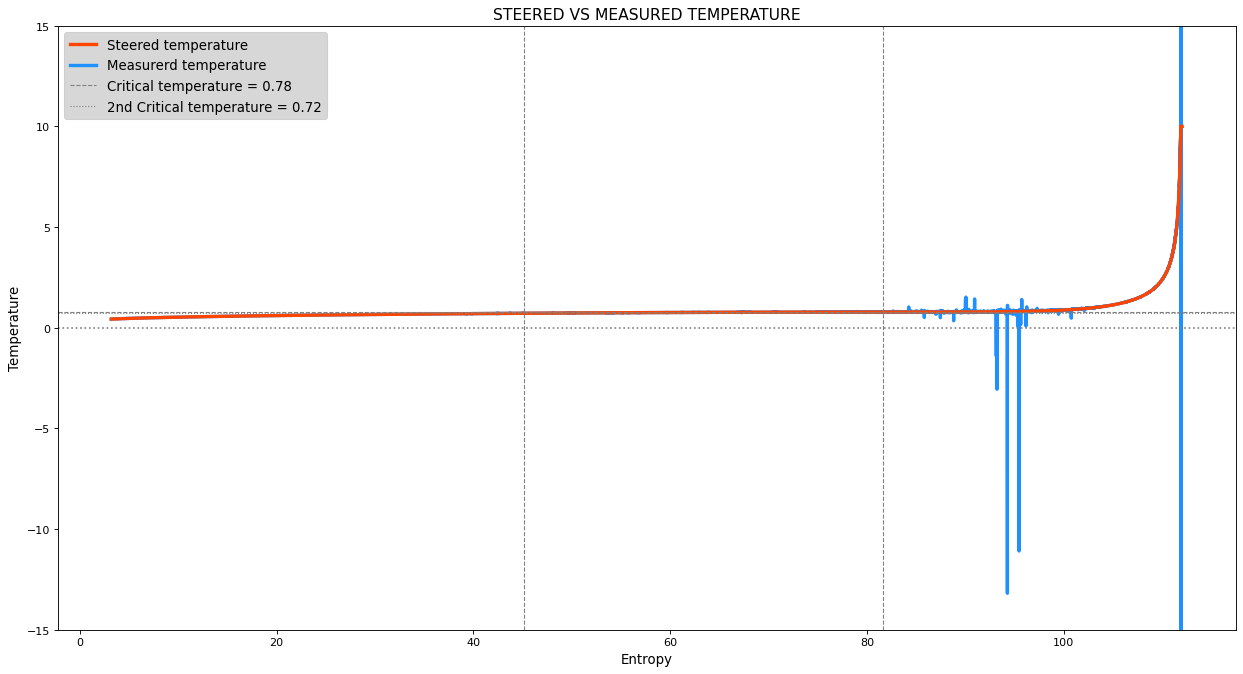

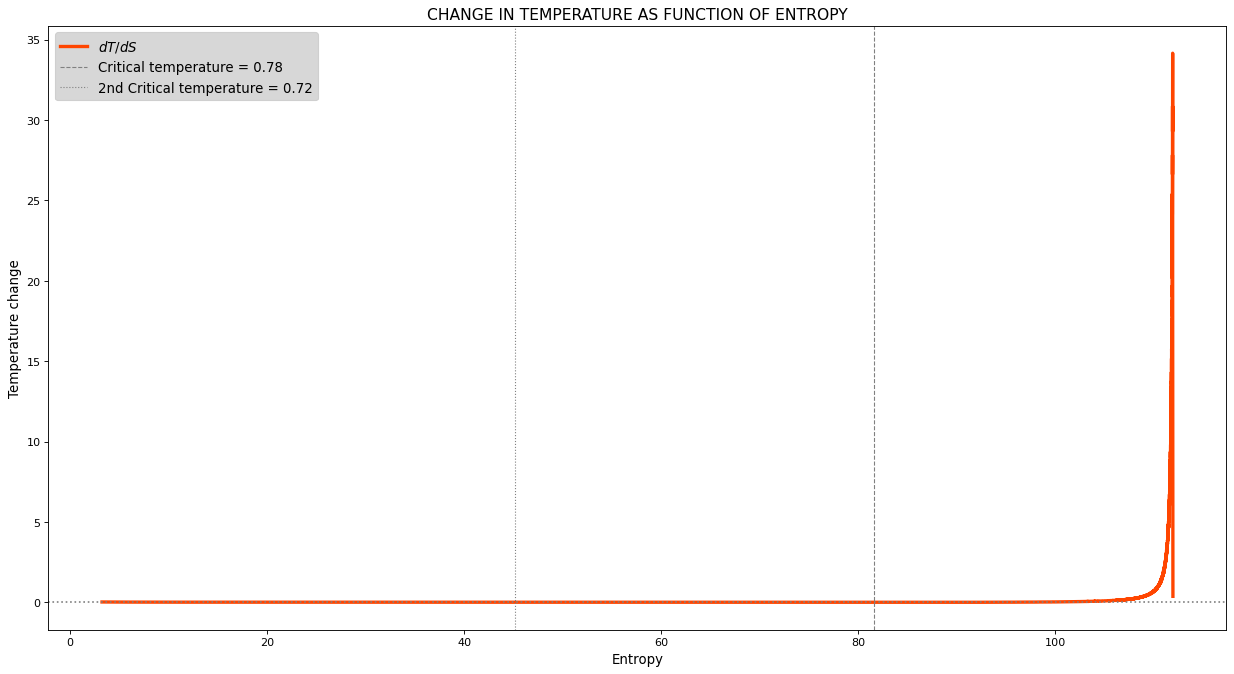

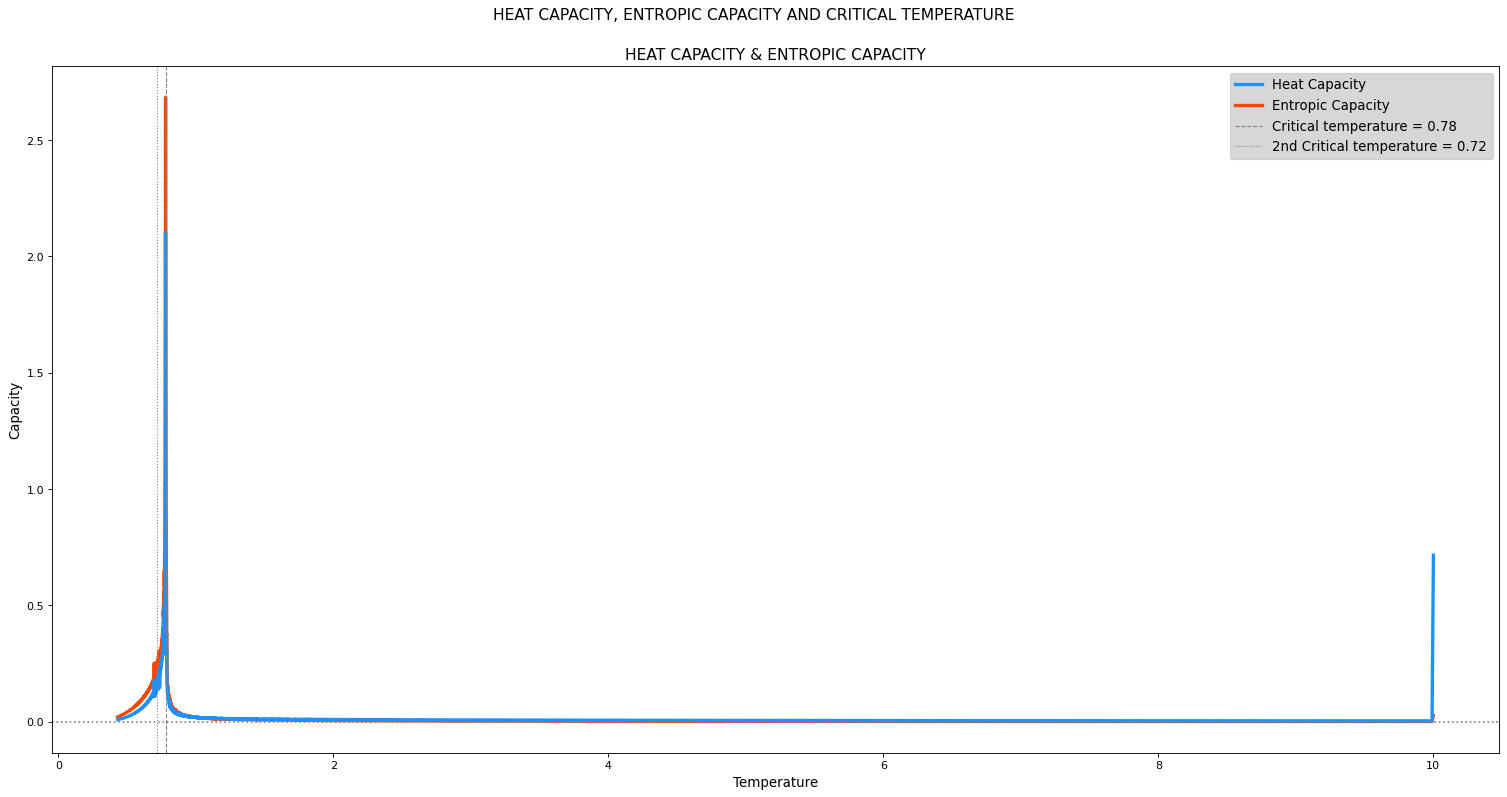

In [10]:
ax1_ylimits=None
ax2_ylimits=None
ax3_xlimits=None
file_name  ='04-1st-critical-temperature.png'

    
both = True
figsize=(19, 10)
legend_color = 'lightgrey'
fig, ax = plt.subplots(1, sharex=False,figsize=figsize, dpi=80)

label_critical_temperature = 'Critical temperature = {:.2f}'.format(minimal_row['T'])
label_2nd_critical_temperature = '2nd Critical temperature = {:.2f}'.format(closest_row['T'])

# ax = ax1
ax.plot(X['Entropy'],X['T'],linewidth=3.0,label='Steered temperature',color=color7,zorder=1)
ax.plot(X['Entropy'],X['t'],linewidth=3.0,label='Measurerd temperature',color=color2,zorder=-1)
ax.set_ylim([-15,15])
ax.set_ylim(ax1_ylimits)
ax.axhline(y=minimal_row['T'],color="gray", linestyle="dashed",label=label_critical_temperature,lw=1)
ax.axvline(x=minimal_row['Entropy'],color="gray", linestyle="dashed",lw=1)
if both:
    ax.axhline(y=closest_row['T'],color="gray", linestyle="dotted",label=label_2nd_critical_temperature,lw=1)
    ax.axvline(x=closest_row['Entropy'],color="gray", linestyle="dashed",lw=1)
ax.axhline(y=0, color="gray", linestyle="dotted")
ax.set_title('STEERED VS MEASURED TEMPERATURE')
ax.set_xlabel('Entropy')
ax.set_ylabel('Temperature')
ax.legend(framealpha=0.9,facecolor=legend_color)
plt.savefig('../output/presentation/{}'.format('04-1st-critical-temperature-01.png'),transparent=True)


fig, ax = plt.subplots(1, sharex=False,figsize=figsize, dpi=80)
# ax = ax2
ax.plot(Y['Entropy'],Y['dT'],lw=3,color=color7,label='$dT/dS$')
ax.axvline(x=minimal_row['Entropy'],color="gray", linestyle="dashed",label=label_critical_temperature,lw=1)
if both:
    ax.axvline(x=closest_row['Entropy'],color="gray", linestyle="dotted",label=label_2nd_critical_temperature,lw=1)
ax.axhline(y=0, color="gray", linestyle="dotted")
ax.set_xlabel('Entropy')
ax.set_ylabel('$dT/dS$')
ax.set_title('CHANGE IN TEMPERATURE AS FUNCTION OF ENTROPY')
ax.set_ylabel('Temperature change')
ax.set_ylim(ax2_ylimits)
ax.legend(framealpha=0.9,facecolor=legend_color)
plt.savefig('../output/presentation/{}'.format('04-1st-critical-temperature-02.png'),transparent=True)

fig, ax = plt.subplots(1, sharex=False,figsize=figsize, dpi=80)
# ax = ax3
ax.plot(Y['T'],Z['Energy'],linewidth=3.0,label='Heat Capacity',color=color2, zorder=1)
ax.plot(Y['T'],Z['Entropy'],linewidth=3.0,label='Entropic Capacity',color=color7, zorder=-1)
ax.axvline(x=Y.iloc[idx]['T'], color='gray', linewidth=1.0, label=label_critical_temperature,linestyle = 'dashed')
if both:
    ax.axvline(x=closest_row['T'], color='gray', linewidth=1.0, label=label_2nd_critical_temperature,linestyle = 'dotted')
ax.axhline(y=0, color="gray", linestyle="dotted")
ax.set_title('HEAT CAPACITY & ENTROPIC CAPACITY')
ax.set_xlim(ax3_xlimits)
ax.set_xlabel('Temperature')
ax.set_ylabel('Capacity')
ax.legend(framealpha=0.9,facecolor=legend_color)
plt.savefig('../output/presentation/{}'.format('04-1st-critical-temperature-03.png'),transparent=True)

fig.suptitle('HEAT CAPACITY, ENTROPIC CAPACITY AND CRITICAL TEMPERATURE',y=0.995)
fig.tight_layout() 